In [49]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

In [50]:
def SmilesMCStoGridImage(*smiles, **kwargs):
     mols = [Chem.MolFromSmiles(smile) for smile in smiles]
     res = rdFMCS.FindMCS(mols, **kwargs)
     # res = rdFMCS.FindMCS(mols, maximizeBonds=True)
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     # print(f"{smarts=}")
     smart_mol = Chem.MolFromSmarts(smarts)
     # smarts = Draw.MolToImage(smart_mol)
     smarts_and_mols = [smart_mol] + mols
     # print(f"{mols[0]=}")
     # print(f"{mols[0].GetSubstructMatch(mcs_mol)=}")
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]
     # matches = [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     # p = Chem.MolFromSmiles(smiles[0])
   
     # subms = [x for x in smarts_and_mols if x.HasSubstructMatch(p)]
     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(mcs_mol)]
     # print(f"{len(subms)=}")

     Chem.Compute2DCoords(mcs_mol)
     # for m in subms:
     #      _ = Chem.GenerateDepictionMatching2DStructure(m, p)
     for m in subms:
          _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mol)

     return Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches)

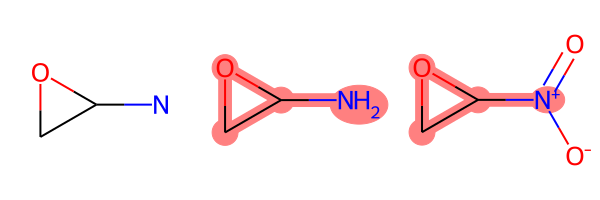

In [51]:
SmilesMCStoGridImage("NC1OC1", "C1OC1[N+](=O)[O-]")

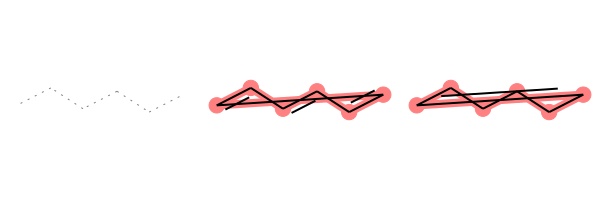

In [52]:
SmilesMCStoGridImage("c1ccccc1", "C1CCCC=C1")

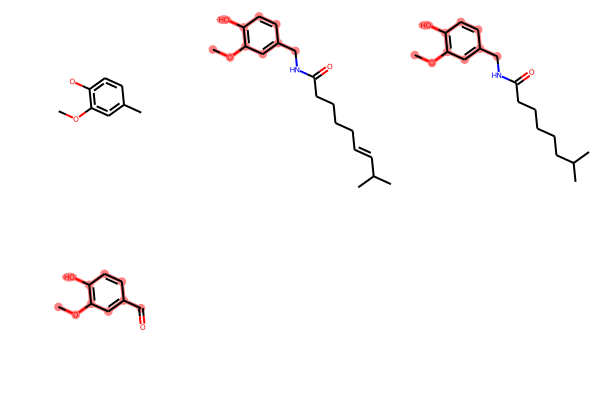

In [53]:
SmilesMCStoGridImage("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C", "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1")